<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/Pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importação das Bibliotecas

O ponto de partida de qualquer análise em Python é a importação das bibliotecas. O código carrega o "canivete suíço" da ciência de dados: pandas para a manipulação de tabelas (DataFrames) , numpy para operações numéricas eficientes , matplotlib e seaborn para a visualização gráfica, e sklearn para ferramentas de aprendizado de máquina.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.gridspec import GridSpec

## 2. Leitura do Arquivo CSV

Imediatamente após a importação das bibliotecas, ocorre a leitura do arquivo CSV. O comando pd.read_csv  carrega os dados brutos para a memória, armazenando-os na variável df. A contagem de linhas (len(df)) revela a escala do problema: um conjunto de 17.378 estrelas, informação crucial para o planejamento computacional.



In [2]:
# Carregamos o arquivo CSV em um DataFrame do Pandas.

df = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas = len(df)
print(f"O número total de estrelas é: {numero_estrelas}")

O número total de estrelas é: 17378


In [3]:
# Carregamos o arquivo CSV do erro em um DataFrame do Pandas separadamente.


df_err = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/ERR_Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas_err = len(df)
print(f"O número total de estrelas é: {numero_estrelas_err}")

O número total de estrelas é: 17378


## 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos. Já o dataframe que possui `TILE_ID`, `NUMBER`, `MAG_ERR_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe` é relacionado ao Vetor de erro para magnitude.

In [4]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


Antes de modificar qualquer dado, é vital inspecioná-lo. Inicialmente realiza-se a visualização das primeiras linhas com df.head(). Esta é uma etapa diagnóstica essencial. A saída revela imediatamente o primeiro desafio de pré-processamento: as colunas MAG_APER_COR_3_0 e MAG_ERR_APER_COR_3_0 não são um valor único, mas sim uma string de texto contendo dezenas de valores de magnitude separados por espaços, o primeirosão os valores propriamente dito das agnitudes e o segundo é o erro por cada uma delas.

In [5]:
#Exibimos as primeiras linhas do DataFrame dos erros para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df_err.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584


## 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [6]:
# 1. PROCESSAMENTO SEPARADO PARA CADA DATAFRAME

# Para df (magnitudes)
colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Para df_err (erros)
colunas_err_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [7]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [8]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df_err.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_ERR_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [9]:
# Dividimos as colunas `MAG_APER_COR_3_0` e 'MAG_ERR_APER_COR_3_0' em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)
df_err[colunas_err_fotometria] = df_err['MAG_ERR_APER_COR_3_0'].str.split(expand=True)


In [10]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)
df_err[colunas_err_fotometria] = df_err[colunas_err_fotometria].apply(pd.to_numeric)

In [11]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [12]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df_err.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295,0.0497,0.0475,0.0273,0.0151,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989,0.0059,0.0032,0.0033,0.0018,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867,0.0065,0.0049,0.0054,0.0025,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600,0.0076,0.0051,0.0090,0.0028,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584,0.0053,0.0045,0.0051,0.0026,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


In [13]:
# 2. RENOMEÇÃO PARA AMBOS OS DATAFRAMES (Renomear as bandas fotométricas)

# Carregar o arquivo CSV com os nomes das bandas
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Verificar se temos 57 nomes de banda (para corresponder às 57 colunas de fotometria)
if len(filter_names) == 57:
    # Criar um dicionário para mapear os nomes antigos para os novos
    rename_dict = {f'Fotometria_{i+1}': filter_names[i] for i in range(57)}

    # Renomear as colunas no DataFrame principal
    df = df.rename(columns=rename_dict)
    df_err = df_err.rename(columns=rename_dict)

    print("Bandas fotométricas renomeadas com sucesso!")
else:
    print(f"Atenção: Número de bandas ({len(filter_names)}) não corresponde ao número de colunas de fotometria (57)")

Bandas fotométricas renomeadas com sucesso!


In [14]:
# 3. REMOVER COLUNAS ORIGINAIS
#df = df.drop(['MAG_APER_COR_3_0'], axis=1)
#df_err = df_err.drop(['MAG_ERR_APER_COR_3_0'], axis=1)

#print("Colunas originais removidas com sucesso!")

In [15]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


In [16]:
# Exibir as primeiras linhas após o pré-processamento
print("\nDataFrame após divisão e renomeação das colunas de fotometria:")
df_err.head()


DataFrame após divisão e renomeação das colunas de fotometria:


,TILE_ID,NUMBER,MAG_ERR_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,...,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,iSDSS
0,8955,46387,0.0497 0.0475 0.0273 0.0151 0.0151 0.0116 0.01...,1.2200,0.1069,8.762295,0.0497,0.0475,0.0273,0.0151,...,0.0031,0.0029,0.0026,0.0025,0.0025,0.0029,0.0032,0.0029,0.0026,0.0013
1,9654,7,0.0059 0.0032 0.0033 0.0018 0.0047 0.0028 0.00...,0.0947,0.0181,19.112989,0.0059,0.0032,0.0033,0.0018,...,0.0013,0.0027,0.0017,0.0030,0.0023,0.0028,0.0034,0.0017,0.0022,0.0008
2,9654,10,0.0065 0.0049 0.0054 0.0025 0.0058 0.0035 0.00...,1.2176,0.0145,1.190867,0.0065,0.0049,0.0054,0.0025,...,0.0008,0.0017,0.0011,0.0018,0.0014,0.0017,0.0021,0.0011,0.0013,0.0006
3,9654,12,0.0076 0.0051 0.0090 0.0028 0.0066 0.0052 0.00...,0.5735,0.0212,3.696600,0.0076,0.0051,0.0090,0.0028,...,0.0015,0.0025,0.0016,0.0029,0.0022,0.0033,0.0033,0.0017,0.0017,0.0010
4,9654,15,0.0053 0.0045 0.0051 0.0026 0.0061 0.0037 0.00...,0.7961,0.0181,2.273584,0.0053,0.0045,0.0051,0.0026,...,0.0015,0.0020,0.0014,0.0023,0.0017,0.0026,0.0023,0.0012,0.0016,0.0008


Esses blocos executam o "coração" do pré-processamento. O objetivo é "desmembrar" aquela string problemática em colunas numéricas individuais.

Primeiro, uma lista de 57 nomes de colunas genéricos (ex: Fotometria_1, Fotometria_2...) é criada.

Em seguida, o método str.split(expand=True) é aplicado à coluna MAG_APER_COR_3_0. Esta função "fatia" a string em cada espaço, e o expand=True garante que cada valor fatiado se torne uma nova coluna no DataFrame.

Finalmente, o método apply(pd.to_numeric) é usado para converter essas novas colunas, que ainda são texto, em valores numéricos. Sem essa conversão, nenhum cálculo matemático seria possível.



---



---



Com os dados estruturalmente corretos, o foco muda para o "enriquecimento semântico". Com a substituição dos nomes genéricos (ex:Fotometria_1, Fotometria_2, Fotometria_3, etc) pelos nomes científicos reais das bandas fotométricas (ex: uJAVA, J0378, etc.). Isso é feito carregando-se um segundo arquivo CSV (804024.csv) que contém o mapeamento de nomes e aplicando o método df.rename. Esta etapa, embora simples, é crucial para a interpretabilidade científica dos resultados. A seguir, o notebook entra na FASE 1: Verificação de valores nulos



#### **GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO**

In [17]:
print("=" * 60)
print("GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO")
print("=" * 60)

# Salvar os dataframes processados para uso futuro
df.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_magnitudes_processado.csv', index=False)
df_err.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_erros_processado.csv', index=False)

print("DataFrames salvos com sucesso!")
print(f"df shape: {df.shape}")
print(f"df_err shape: {df_err.shape}")
print(f"Bandas disponíveis: {len(filter_names)}")
print("\nPrimeiras 10 bandas:", filter_names[:10])

GERANDO ARQUIVOS DOS DATAFRAMES APÓS RENOMEÇÃO
DataFrames salvos com sucesso!
df shape: (17378, 63)
df_err shape: (17360, 63)
Bandas disponíveis: 57

Primeiras 10 bandas: ['uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0460']


#### **4.1 Verificar valores nulos, NA, NaN em todas as bandas**

Em astronomia, dados ausentes podem ser representados por valores padrão (NaN, None) ou por placeholders (valores sentinela), como 99. O código, de forma prudente, verifica ambos:



1.   Na procura por NaN ou None. A saída mostra 0 para todas as bandas .
2.   Um laço for verifica explicitamente a contagem de valores == 99. A saída também retorna 0 para todas as bandas.

A vantagem desta verificação dupla é a robustez. A desvantagem de não encontrar valores nulos é estatisticamente improvável em dados reais, o que pode sugerir que um filtro de limpeza já foi aplicado na origem dos dados, ou que o valor 99 foi apenas um exemplo e outros placeholders (como -99 ou 99.99) poderiam existir.



In [18]:
print("\n" + "=" * 60)
print("VERIFICAÇÃO DE VALORES NULOS E AUSENTES")
print("=" * 60)

# Lista de valores sentinela comuns em dados astronômicos
valores_sentinela = [99, -99, 99.99, -99.99, 999, -999, 999.999, -999.999, 0, -1]

def verificar_dados_ausentes(df, df_err, filter_names, valores_sentinela):
    """
    Função melhorada para verificação de dados ausentes e valores sentinela
    IMPORTANTE: Não remove outliers pois eles são o foco do estudo
    """
    resultados = {}

    print("\n 1. VERIFICAÇÃO DE VALORES AUSENTES PADRÃO:")
    print("-" * 40)

    # Verificar valores nulos/ausentes padrão
    nulos_df = df[filter_names].isnull().sum()
    nulos_df_err = df_err[filter_names].isnull().sum()

    print("Valores NaN em df (magnitudes):")
    print(nulos_df)
    print(f"\n Total de valores NaN em df: {nulos_df.sum()}")

    print("\nValores NaN em df_err (erros):")
    print(nulos_df_err)
    print(f"Total de valores NaN em df_err: {nulos_df_err.sum()}")

    # Verificar infinitos
    infinitos_df = np.isinf(df[filter_names]).sum().sum()
    infinitos_df_err = np.isinf(df_err[filter_names]).sum().sum()
    print(f"\n Valores infinitos em df: {infinitos_df}")
    print(f" Valores infinitos em df_err: {infinitos_df_err}")

    print("\n 2. VERIFICAÇÃO DE VALORES SENTINELA:")
    print("-" * 40)

    # Verificar valores sentinela em ambas as bases
    sentinela_encontrado = False
    for sentinela in valores_sentinela:
        count_sentinela_df = (df[filter_names] == sentinela).sum().sum()
        count_sentinela_df_err = (df_err[filter_names] == sentinela).sum().sum()

        if count_sentinela_df > 0 or count_sentinela_df_err > 0:
            sentinela_encontrado = True
            print(f" Valor sentinela {sentinela}:")
            print(f"   - df: {count_sentinela_df} ocorrências")
            print(f"   - df_err: {count_sentinela_df_err} ocorrências")

    if not sentinela_encontrado:
        print("Nenhum valor sentinela encontrado")

    print("\n 3. VERIFICAÇÃO DE FAIXAS DE VALORES:")
    print("-" * 40)

    # Verificar faixas de valores esperadas para magnitudes astronômicas
    # NOTA: Não removemos outliers, apenas verificamos para diagnóstico
    magnitudes_fora_faixa = ((df[filter_names] < 10) | (df[filter_names] > 30)).sum().sum()
    erros_fora_faixa = ((df_err[filter_names] < 0) | (df_err[filter_names] > 5)).sum().sum()

    print(f"Magnitudes fora da faixa típica 10-30: {magnitudes_fora_faixa}")
    print(f"Erros fora da faixa típica 0-5: {erros_fora_faixa}")

    # Estatísticas básicas das magnitudes
    print(f"\n Estatísticas das magnitudes (todas as bandas):")
    print(f"   Mínimo: {df[filter_names].min().min():.2f}")
    print(f"   Máximo: {df[filter_names].max().max():.2f}")
    print(f"   Média: {df[filter_names].mean().mean():.2f}")

    return {
        'nulos_df': nulos_df,
        'nulos_df_err': nulos_df_err,
        'infinitos_df': infinitos_df,
        'infinitos_df_err': infinitos_df_err
    }

# Executar verificação melhorada
resultados_verificacao = verificar_dados_ausentes(df, df_err, filter_names, valores_sentinela)

print("\n Verificação de dados concluída!")


VERIFICAÇÃO DE VALORES NULOS E AUSENTES

 1. VERIFICAÇÃO DE VALORES AUSENTES PADRÃO:
----------------------------------------
Valores NaN em df (magnitudes):
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490    0
J0500    0
J0510    0
J0520    0
J0530    0
J0540    0
J0550    0
J0560    0
J0570    0
J0580    0
J0590    0
J0600    0
J0610    0
J0620    0
J0630    0
J0640    0
J0650    0
J0660    0
J0670    0
J0680    0
J0690    0
J0700    0
J0710    0
J0720    0
J0730    0
J0740    0
J0750    0
J0760    0
J0770    0
J0780    0
J0790    0
J0800    0
J0810    0
J0820    0
J0830    0
J0840    0
J0850    0
J0860    0
J0870    0
J0880    0
J0890    0
J0900    0
J0910    0
J1007    0
iSDSS    0
dtype: int64

 Total de valores NaN em df: 0

Valores NaN em df_err (erros):
uJAVA    0
J0378    0
J0390    0
J0400    0
J0410    0
J0420    0
J0430    0
J0440    0
J0450    0
J0460    0
J0470    0
J0480    0
J0490

### **4.2 Conversão de Magnitude para unidade de fluxo para cada banda**

In [19]:
print("CONVERSÃO DE MAGNITUDE PARA FLUXO (df E df_err)")
print("=" * 60)

def magnitude_para_fluxo(magnitude, magnitude_zero=0):
    """
    Converte magnitude para fluxo usando a fórmula astronômica padrão:
    F = F0 * 10^(-0.4 * m)
    onde F0 é o fluxo zero (para magnitude 0)
    """
    return 10**(-0.4 * (magnitude - magnitude_zero))

def erro_magnitude_para_erro_fluxo(fluxo, erro_magnitude):
    """
    Converte o erro da magnitude para erro do fluxo
    usando propagação de incertezas:
    σ_fluxo = |dF/dm| * σ_magnitude = (F * ln(10) * 0.4) * σ_magnitude
    """
    return fluxo * np.log(10) * 0.4 * erro_magnitude

print("Convertendo magnitudes para fluxos (df)...")

# Criar DataFrame para fluxos mantendo todas as colunas originais
df_fluxo = df.copy()  # Manter todas as colunas originais

# Converter cada banda fotométrica de magnitude para fluxo no df
for banda in filter_names:
    df_fluxo[f'fluxo_{banda}'] = magnitude_para_fluxo(df[banda])

print(f" DataFrame de fluxos (df) criado com shape: {df_fluxo.shape}")

print("Convertendo erros de magnitude para erros de fluxo (df_err)...")

# Criar DataFrame para erros de fluxo mantendo colunas originais
df_fluxo_err = df_err.copy()  # Manter colunas originais do df_err

# Converter cada erro de magnitude para erro de fluxo no df_err
for banda in filter_names:
    # Primeiro precisamos do fluxo correspondente do df_fluxo
    fluxo_banda = df_fluxo[f'fluxo_{banda}']
    erro_magnitude_banda = df_err[banda]

    # Converter erro de magnitude para erro de fluxo
    df_fluxo_err[f'erro_fluxo_{banda}'] = erro_magnitude_para_erro_fluxo(
        fluxo_banda, erro_magnitude_banda
    )

print(f"DataFrame de erros de fluxo (df_err) criado com shape: {df_fluxo_err.shape}")

# Mostrar amostra dos dados convertidos
print("\n Amostra dos dados convertidos - FLUXOS (primeiras 3 bandas):")
colunas_fluxo_amostra = [f'fluxo_{banda}' for banda in filter_names[:3]]
print("df_fluxo (fluxos):")
print(df_fluxo[['TILE_ID', 'NUMBER'] + colunas_fluxo_amostra].head())

print("\n Amostra dos dados convertidos - ERROS DOS FLUXOS (primeiras 3 bandas):")
colunas_erro_fluxo_amostra = [f'erro_fluxo_{banda}' for banda in filter_names[:3]]
print("df_fluxo_err (erros dos fluxos):")
print(df_fluxo_err[['TILE_ID', 'NUMBER'] + colunas_erro_fluxo_amostra].head())

print("\n Estatísticas dos fluxos convertidos:")
for banda in filter_names[:3]:  # Mostrar apenas 3 bandas para não poluir
    fluxo_col = f'fluxo_{banda}'
    erro_fluxo_col = f'erro_fluxo_{banda}'

    print(f"\n {banda}:")
    print(f"   Fluxo: min={df_fluxo[fluxo_col].min():.6f}, max={df_fluxo[fluxo_col].max():.6f}, média={df_fluxo[fluxo_col].mean():.6f}")
    print(f"   Erro do Fluxo: min={df_fluxo_err[erro_fluxo_col].min():.6f}, max={df_fluxo_err[erro_fluxo_col].max():.6f}, média={df_fluxo_err[erro_fluxo_col].mean():.6f}")

# Verificar consistência dos dados
print(f"\n VERIFICAÇÃO DE CONSISTÊNCIA:")
print(f"   Número de estrelas no df_fluxo: {len(df_fluxo)}")
print(f"   Número de estrelas no df_fluxo_err: {len(df_fluxo_err)}")
print(f"   Colunas no df_fluxo: {len(df_fluxo.columns)}")
print(f"   Colunas no df_fluxo_err: {len(df_fluxo_err.columns)}")
print(f"   Bandas convertidas: {len(filter_names)}")

print("\n Conversão para fluxos concluída para ambos os DataFrames!")

CONVERSÃO DE MAGNITUDE PARA FLUXO (df E df_err)
Convertendo magnitudes para fluxos (df)...
 DataFrame de fluxos (df) criado com shape: (17378, 120)
Convertendo erros de magnitude para erros de fluxo (df_err)...
DataFrame de erros de fluxo (df_err) criado com shape: (17360, 120)

 Amostra dos dados convertidos - FLUXOS (primeiras 3 bandas):
df_fluxo (fluxos):
   TILE_ID  NUMBER   fluxo_uJAVA   fluxo_J0378   fluxo_J0390
0     8955   46387  1.605462e-08  1.656533e-08  1.868960e-08
1     9654       7  2.726465e-07  7.211075e-07  9.028176e-07
2     9654      10  2.263602e-07  3.101701e-07  3.302174e-07
3     9654      12  1.701375e-07  2.934945e-07  2.910717e-07
4     9654      15  3.182731e-07  3.711932e-07  3.715352e-07

 Amostra dos dados convertidos - ERROS DOS FLUXOS (primeiras 3 bandas):
df_fluxo_err (erros dos fluxos):
   TILE_ID  NUMBER  erro_fluxo_uJAVA  erro_fluxo_J0378  erro_fluxo_J0390
0     8955   46387      7.349065e-10      7.247184e-10      4.699356e-10
1     9654       7   

### **4.3 Calcular SNR (Signal-to-Noise Ratio) para cada banda**

Esta seção é o objetivo final do pré-processamento: avaliar a qualidade dos dados.

FASE 2: Geração do Indicador. O código calcula a Relação Sinal-Ruído (SNR). O SNR é a métrica fundamental da qualidade de uma medição; valores altos indicam um sinal limpo, valores baixos indicam um sinal ruidoso.

In [20]:
print("\n" + "=" * 60)
print("CÁLCULO DO SNR (SIGNAL-TO-NOISE RATIO) - USANDO FLUXOS E ERROS CONVERTIDOS")
print("=" * 60)

print("Merging df_fluxo and df_fluxo_err for SNR calculation...")

# Merge df_fluxo and df_fluxo_err on TILE_ID and NUMBER
# Use an inner merge to keep only rows present in both dataframes
df_fluxo_merged = pd.merge(df_fluxo, df_fluxo_err, on=['TILE_ID', 'NUMBER'], how='inner', suffixes=('_fluxo', '_erro_fluxo'))

print(f"Merged DataFrame shape: {df_fluxo_merged.shape}")

print("Calculando SNR para cada banda usando fluxos e erros convertidos...")

# Create DataFrame for SNR, keeping identifiers from the merged dataframe
df_snr_fluxo = df_fluxo_merged[['TILE_ID', 'NUMBER']].copy()

# Calculate SNR for each band using the merged dataframe
# Ensure filter_names are valid columns in the merged dataframe with both flux and error
valid_filter_names_merged_fluxo = [banda for banda in filter_names if f'fluxo_{banda}' in df_fluxo_merged.columns and f'erro_fluxo_{banda}' in df_fluxo_merged.columns]

for banda in valid_filter_names_merged_fluxo:
    fluxo_col = f'fluxo_{banda}'
    erro_fluxo_col = f'erro_fluxo_{banda}'

    # Avoid division by zero by replacing 0 error with a small value
    erro_fluxo_seguro = df_fluxo_merged[erro_fluxo_col].replace(0, 1e-10)

    # Calculate SNR directly from merged columns
    df_snr_fluxo[f'SNR_{banda}'] = df_fluxo_merged[fluxo_col] / erro_fluxo_seguro


print("Cálculo do SNR concluído.")
print(f"DataFrame de SNR (usando fluxos) criado com shape: {df_snr_fluxo.shape}")

# Estatísticas básicas do SNR
print("\n Estatísticas gerais do SNR (usando fluxos, todas as bandas):")
snr_colunas_fluxo = [col for col in df_snr_fluxo.columns if col.startswith('SNR_')]

if snr_colunas_fluxo:
    # Calculate global statistics
    snr_min_global_fluxo = df_snr_fluxo[snr_colunas_fluxo].min().min()
    snr_max_global_fluxo = df_snr_fluxo[snr_colunas_fluxo].max().max()
    snr_mean_global_fluxo = df_snr_fluxo[snr_colunas_fluxo].mean().mean()
    snr_median_global_fluxo = df_snr_fluxo[snr_colunas_fluxo].median().median()

    print(f"   Mínimo global: {snr_min_global_fluxo:.2f}")
    print(f"   Máximo global: {snr_max_global_fluxo:.2f}")
    print(f"   Média global: {snr_mean_global_fluxo:.2f}")
    print(f"   Mediana global: {snr_median_global_fluxo:.2f}")

    # Mostrar estatísticas para some specific bands (first 3)
    print(f"\n Estatísticas do SNR por banda (usando fluxos, amostra de 3 bandas):")
    for banda in valid_filter_names_merged_fluxo[:3]:
        snr_banda_fluxo = df_snr_fluxo[f'SNR_{banda}']
        print(f"     {banda}:")
        print(f"      Mínimo: {snr_banda_fluxo.min():.2f}")
        print(f"      Máximo: {snr_banda_fluxo.max():.2f}")
        print(f"      Média: {snr_banda_fluxo.mean():.2f}")
        print(f"      Mediana: {snr_banda_fluxo.median():.2f}")

    # Mostrar amostra dos dados de SNR
    print("\n Amostra dos dados de SNR (usando fluxos, primeiras 3 bandas):")
    colunas_snr_amostra_fluxo = [f'SNR_{banda}' for banda in valid_filter_names_merged_fluxo[:3]]
    display(df_snr_fluxo[['TILE_ID', 'NUMBER'] + colunas_snr_amostra_fluxo].head())

else:
    print("No SNR columns found to describe or display.")


print("\n Cálculo do SNR concluído usando fluxos e erros convertidos!")


CÁLCULO DO SNR (SIGNAL-TO-NOISE RATIO) - USANDO FLUXOS E ERROS CONVERTIDOS
Merging df_fluxo and df_fluxo_err for SNR calculation...
Merged DataFrame shape: (17564, 238)
Calculando SNR para cada banda usando fluxos e erros convertidos...
Cálculo do SNR concluído.
DataFrame de SNR (usando fluxos) criado com shape: (17564, 59)

 Estatísticas gerais do SNR (usando fluxos, todas as bandas):
   Mínimo global: 0.00
   Máximo global: 7886137202.77
   Média global: 84724.04
   Mediana global: 158.70

 Estatísticas do SNR por banda (usando fluxos, amostra de 3 bandas):
     uJAVA:
      Mínimo: 0.00
      Máximo: 4456593938.53
      Média: 626324.09
      Mediana: 17.67
     J0378:
      Mínimo: 0.00
      Máximo: 1073996992.59
      Média: 352026.76
      Mediana: 21.29
     J0390:
      Mínimo: 0.00
      Máximo: 7886137202.77
      Média: 701935.48
      Mediana: 28.80

 Amostra dos dados de SNR (usando fluxos, primeiras 3 bandas):


,TILE_ID,NUMBER,SNR_uJAVA,SNR_J0378,SNR_J0390
0,8955,46387,21.845799,22.857604,39.770557
1,8955,46387,0.703668,0.375518,0.550506
2,9654,7,184.023086,339.292564,329.010971
3,9654,10,167.036339,221.578817,201.062260
4,9654,12,142.860027,212.889452,120.637356



 Cálculo do SNR concluído usando fluxos e erros convertidos!


### 4.4 Histograma do sinal/ruído de cada banda

FASE 3: Visualização dos Dados, tenta a primeira abordagem de visualização: plotar os histogramas de SNR para todas as 56 bandas (excluindo iSDSS ) em um grande painel de subplots. O resultado, embora completo, é visualmente poluído e difícil de inspecionar individualmente.

*   **Interatividade:** O código lista todas as bandas disponíveis e solicita ativamente que o usuário digite os números das bandas que deseja analisar (ex: "45,7,39").
*   **Robustez:** Utiliza threading para criar um timeout de 5 minutos. Se o usuário não responder, o script não trava; ele seleciona 3 bandas aleatoriamente e continua.
*   **Análise Focada:** Ele então plota histogramas limpos apenas para as bandas selecionadas, incluindo linhas de média e mediana.
*   **Relatório Detalhado:** Por fim, imprime estatísticas descritivas (mínimo, máximo, média, mediana, desvio padrão) apenas para as bandas selecionadas.

Esta abordagem interativa é uma grande vantagem para a análise exploratória, permitindo ao cientista focar em bandas de interesse específico (ex: J0810, J0430, J0750)

#### **ESCALA INDIVIDUALIZADA**

Bandas disponíveis:
 0. uJAVA
 1. J0378
 2. J0390
 3. J0400
 4. J0410
 5. J0420
 6. J0430
 7. J0440
 8. J0450
 9. J0460
10. J0470
11. J0480
12. J0490
13. J0500
14. J0510
15. J0520
16. J0530
17. J0540
18. J0550
19. J0560
20. J0570
21. J0580
22. J0590
23. J0600
24. J0610
25. J0620
26. J0630
27. J0640
28. J0650
29. J0660
30. J0670
31. J0680
32. J0690
33. J0700
34. J0710
35. J0720
36. J0730
37. J0740
38. J0750
39. J0760
40. J0770
41. J0780
42. J0790
43. J0800
44. J0810
45. J0820
46. J0830
47. J0840
48. J0850
49. J0860
50. J0870
51. J0880
52. J0890
53. J0900
54. J0910
55. J1007
56. iSDSS

Digite os números das bandas que deseja visualizar (separados por vírgula):
Exemplo: 0,5,10 ou 'all' para todas as bandas
Suas escolhas: 10,20,30


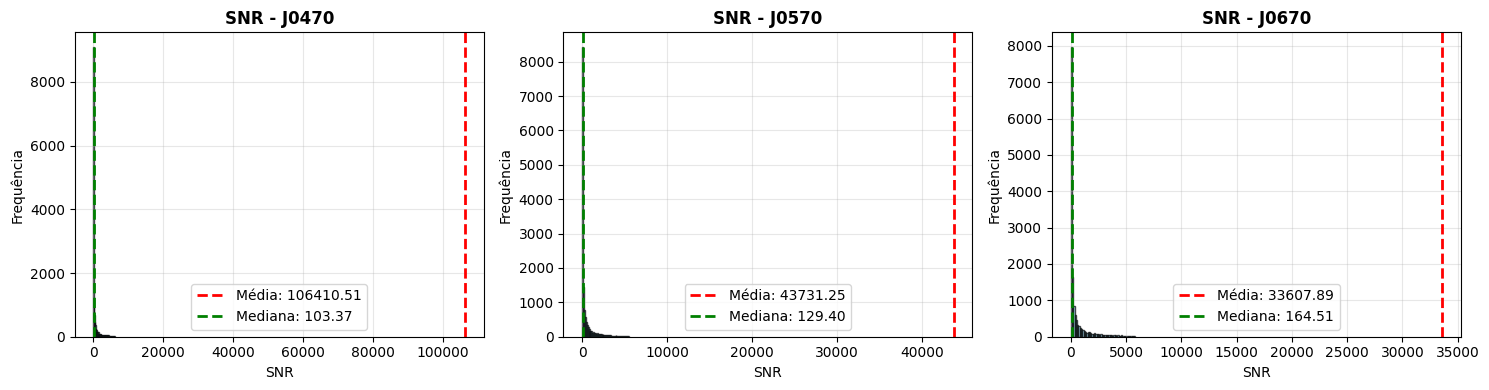


ESTATÍSTICAS DETALHADAS DAS BANDAS SELECIONADAS

J0470:
  Mínimo: 0.00
  Máximo: 549989395.27
  Média: 106410.51
  Mediana: 103.37
  Desvio Padrão: 4257914.64
  Q1: 7.14
  Q3: 1542.05

J0570:
  Mínimo: 0.00
  Máximo: 23963724.37
  Média: 43731.25
  Mediana: 129.40
  Desvio Padrão: 506749.54
  Q1: 12.74
  Q3: 1379.01

J0670:
  Mínimo: 0.00
  Máximo: 22625754.23
  Média: 33607.89
  Mediana: 164.51
  Desvio Padrão: 357309.14
  Q1: 20.50
  Q3: 1479.59


In [21]:
def plot_histogramas_snr_interativo(df_snr_fluxo, filter_names):
    """
    Função interativa para plotar histogramas de SNR para bandas selecionadas
    """
    print("Bandas disponíveis:")
    for i, banda in enumerate(filter_names):
        print(f"{i:2d}. {banda}")

    print("\nDigite os números das bandas que deseja visualizar (separados por vírgula):")
    print("Exemplo: 0,5,10 ou 'all' para todas as bandas")

    try:
        entrada = input("Suas escolhas: ").strip()

        if entrada.lower() == 'all':
            bandas_selecionadas = filter_names
        else:
            indices = [int(x.strip()) for x in entrada.split(',')]
            bandas_selecionadas = [filter_names[i] for i in indices]

        n_bandas = len(bandas_selecionadas)

        # Configurar layout dos subplots
        fig = plt.figure(figsize=(15, 4 * ((n_bandas + 2) // 3)))
        gs = GridSpec((n_bandas + 2) // 3, 3, figure=fig)

        for idx, banda in enumerate(bandas_selecionadas):
            ax = fig.add_subplot(gs[idx // 3, idx % 3])
            snr_data = df_snr_fluxo[f'SNR_{banda}']

            # Remover outliers extremos para melhor visualização
            q1 = snr_data.quantile(0.25)
            q3 = snr_data.quantile(0.75)
            iqr = q3 - q1
            limite_superior = q3 + 3 * iqr
            dados_filtrados = snr_data[snr_data <= limite_superior]

            # Plotar histograma
            ax.hist(dados_filtrados, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
            ax.axvline(snr_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {snr_data.mean():.2f}')
            ax.axvline(snr_data.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {snr_data.median():.2f}')

            ax.set_title(f'SNR - {banda}', fontsize=12, fontweight='bold')
            ax.set_xlabel('SNR')
            ax.set_ylabel('Frequência')
            ax.legend()
            ax.grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Estatísticas detalhadas para as bandas selecionadas
        print("\n" + "=" * 50)
        print("ESTATÍSTICAS DETALHADAS DAS BANDAS SELECIONADAS")
        print("=" * 50)

        for banda in bandas_selecionadas:
            snr_banda = df_snr_fluxo[f'SNR_{banda}']
            print(f"\n{banda}:")
            print(f"  Mínimo: {snr_banda.min():.2f}")
            print(f"  Máximo: {snr_banda.max():.2f}")
            print(f"  Média: {snr_banda.mean():.2f}")
            print(f"  Mediana: {snr_banda.median():.2f}")
            print(f"  Desvio Padrão: {snr_banda.std():.2f}")
            print(f"  Q1: {snr_banda.quantile(0.25):.2f}")
            print(f"  Q3: {snr_banda.quantile(0.75):.2f}")

    except Exception as e:
        print(f"Erro na entrada: {e}")
        print("Selecionando 3 bandas aleatórias para demonstração...")
        bandas_aleatorias = np.random.choice(filter_names, size=3, replace=False)
        plot_histogramas_snr_interativo(df_snr_fluxo, bandas_aleatorias)

# Executar visualização interativa
plot_histogramas_snr_interativo(df_snr_fluxo, filter_names)

#### **ESCALA PADRONIZADA**


HISTOGRAMAS DO SNR - MESMA ESCALA PARA TODOS
IMPORTANTE: Todos os plots usam a mesma escala para facilitar comparação
Bandas disponíveis para análise (0 a 56):
 0. uJAVA
 1. J0378
 2. J0390
 3. J0400
 4. J0410
 5. J0420
 6. J0430
 7. J0440
 8. J0450
 9. J0460
10. J0470
11. J0480
12. J0490
13. J0500
14. J0510
15. J0520
16. J0530
17. J0540
18. J0550
19. J0560
20. J0570
21. J0580
22. J0590
23. J0600
24. J0610
25. J0620
26. J0630
27. J0640
28. J0650
29. J0660
30. J0670
31. J0680
32. J0690
33. J0700
34. J0710
35. J0720
36. J0730
37. J0740
38. J0750
39. J0760
40. J0770
41. J0780
42. J0790
43. J0800
44. J0810
45. J0820
46. J0830
47. J0840
48. J0850
49. J0860
50. J0870
51. J0880
52. J0890
53. J0900
54. J0910
55. J1007
56. iSDSS

 Digite os números das bandas que deseja visualizar (separados por vírgula):
   Exemplo: 0,5,10
   Ou 'random' para 6 bandas aleatórias
   Ou 'top5' para as 5 bandas com maior SNR médio
   Ou 'bottom5' para as 5 bandas com menor SNR médio
Suas escolhas: 10,20,30
Banda

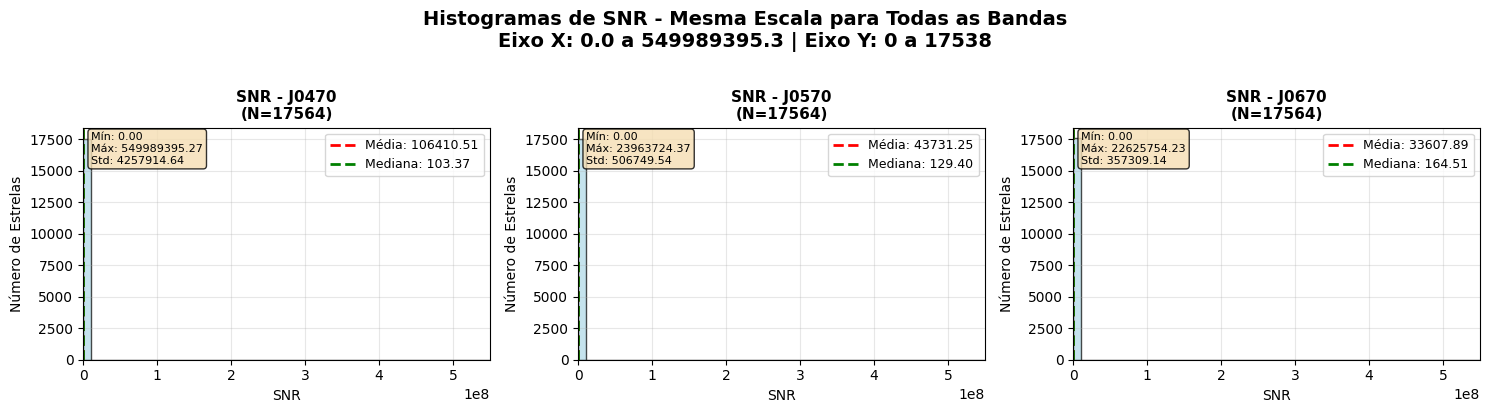


ESTATÍSTICAS DETALHADAS DAS BANDAS SELECIONADAS
TODOS OS DADOS ORIGINAIS - OUTLIERS INCLUSOS
ESCALA UNIFICADA NOS GRÁFICOS
------------------------------------------------------------

 J0470:
      Estatísticas:
      Mínimo: 0.00
      Máximo: 549989395.27
      Média: 106410.51
      Mediana: 103.37
      Desvio Padrão: 4257914.64
      Q1: 7.14
      Q3: 1542.05
      IQR: 1534.91
      Formato: 17564 estrelas

 J0570:
      Estatísticas:
      Mínimo: 0.00
      Máximo: 23963724.37
      Média: 43731.25
      Mediana: 129.40
      Desvio Padrão: 506749.54
      Q1: 12.74
      Q3: 1379.01
      IQR: 1366.28
      Formato: 17564 estrelas

 J0670:
      Estatísticas:
      Mínimo: 0.00
      Máximo: 22625754.23
      Média: 33607.89
      Mediana: 164.51
      Desvio Padrão: 357309.14
      Q1: 20.50
      Q3: 1479.59
      IQR: 1459.10
      Formato: 17564 estrelas

 Visualização interativa com escala unificada concluída!
 Agora você pode comparar visualmente as distribuições entr

In [22]:
print("\n" + "=" * 60)
print("HISTOGRAMAS DO SNR - MESMA ESCALA PARA TODOS")
print("=" * 60)
print("IMPORTANTE: Todos os plots usam a mesma escala para facilitar comparação")

def plot_histogramas_snr_mesma_escala(df_snr_fluxo, filter_names):
    """
    Função interativa para plotar histogramas de SNR para bandas selecionadas
    TODOS OS PLOTS USAM A MESMA ESCALA NOS EIXOS X E Y
    """
    print("Bandas disponíveis para análise (0 a {}):".format(len(filter_names)-1))
    for i, banda in enumerate(filter_names):
        print(f"{i:2d}. {banda}")

    print("\n Digite os números das bandas que deseja visualizar (separados por vírgula):")
    print("   Exemplo: 0,5,10")
    print("   Ou 'random' para 6 bandas aleatórias")
    print("   Ou 'top5' para as 5 bandas com maior SNR médio")
    print("   Ou 'bottom5' para as 5 bandas com menor SNR médio")

    try:
        entrada = input("Suas escolhas: ").strip()

        if entrada.lower() == 'random':
            n_bandas = min(6, len(filter_names))
            bandas_selecionadas = np.random.choice(filter_names, size=n_bandas, replace=False)
            print(f" Bandas aleatórias selecionadas: {list(bandas_selecionadas)}")

        elif entrada.lower() == 'top5':
            snr_medias = []
            for banda in filter_names:
                # Use df_snr_fluxo here
                snr_medias.append((banda, df_snr_fluxo[f'SNR_{banda}'].mean()))
            snr_medias.sort(key=lambda x: x[1], reverse=True)
            bandas_selecionadas = [banda for banda, media in snr_medias[:5]]
            print(f" Top 5 bandas com maior SNR médio: {bandas_selecionadas}")

        elif entrada.lower() == 'bottom5':
            snr_medias = []
            for banda in filter_names:
                # Use df_snr_fluxo here
                snr_medias.append((banda, df_snr_fluxo[f'SNR_{banda}'].mean()))
            snr_medias.sort(key=lambda x: x[1])
            bandas_selecionadas = [banda for banda, media in snr_medias[:5]]
            print(f" Bottom 5 bandas com menor SNR médio: {bandas_selecionadas}")

        else:
            indices = [int(x.strip()) for x in entrada.split(',')]
            indices_validos = []
            for idx in indices:
                if 0 <= idx < len(filter_names):
                    indices_validos.append(idx)
                else:
                    print(f" Índice {idx} ignorado (fora do intervalo 0-{len(filter_names)-1})")

            if not indices_validos:
                print("Nenhum índice válido fornecido. Usando 3 bandas padrão.")
                indices_validos = [0, 1, 2]

            bandas_selecionadas = [filter_names[i] for i in indices_validos]
            print(f"Bandas selecionadas: {bandas_selecionadas}")

        if len(bandas_selecionadas) == 0:
            print("Nenhuma banda selecionada. Usando 3 bandas padrão.")
            bandas_selecionadas = filter_names[:3]

        n_bandas = len(bandas_selecionadas)

        # CALCULAR LIMITES GLOBAIS PARA TODOS OS PLOTS
        print("\n Calculando escala global para todos os plots...")

        # Encontrar limites globais de SNR
        snr_min_global = float('inf')
        snr_max_global = float('-inf')
        count_max_global = 0

        for banda in bandas_selecionadas:
            # Use df_snr_fluxo here
            snr_data = df_snr_fluxo[f'SNR_{banda}']
            snr_min_global = min(snr_min_global, snr_data.min())
            snr_max_global = max(snr_max_global, snr_data.max())

            # Calcular histograma para encontrar a contagem máxima
            counts, bins = np.histogram(snr_data, bins=50)
            count_max_global = max(count_max_global, counts.max())

        print(f" Escala global definida:")
        print(f"   Eixo X (SNR): {snr_min_global:.2f} a {snr_max_global:.2f}")
        print(f"   Eixo Y (Frequência): 0 a {count_max_global}")

        # Configurar layout
        n_cols = min(3, n_bandas)
        n_rows = (n_bandas + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

        # Tratar diferentes casos de subplots
        if n_bandas == 1:
            axes = [axes] if n_cols == 1 else axes
        elif n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows > 1 and n_cols > 1:
            axes = axes.flatten()

        # Plotar histograma para cada banda selecionada COM MESMA ESCALA
        for idx, banda in enumerate(bandas_selecionadas):
            if idx < len(axes):
                ax = axes[idx]
                # Use df_snr_fluxo here
                snr_data = df_snr_fluxo[f'SNR_{banda}']

                # Plotar histograma com ESCALA FIXA
                n, bins, patches = ax.hist(snr_data, bins=50, alpha=0.7,
                                         color='lightblue', edgecolor='black',
                                         density=False,
                                         range=(snr_min_global, snr_max_global))  # MESMA ESCALA X

                # DEFINIR MESMOS LIMITES PARA TODOS
                ax.set_xlim(snr_min_global, snr_max_global)
                ax.set_ylim(0, count_max_global * 1.05)  # MESMA ESCALA Y + 5% margem

                # Adicionar linhas de média e mediana
                ax.axvline(snr_data.mean(), color='red', linestyle='--', linewidth=2,
                          label=f'Média: {snr_data.mean():.2f}')
                ax.axvline(snr_data.median(), color='green', linestyle='--', linewidth=2,
                          label=f'Mediana: {snr_data.median():.2f}')

                ax.set_title(f'SNR - {banda}\n(N={len(snr_data)})', fontsize=11, fontweight='bold')
                ax.set_xlabel('SNR')
                ax.set_ylabel('Número de Estrelas')
                ax.legend(fontsize=9)
                ax.grid(alpha=0.3)

                # Adicionar box de estatísticas
                stats_text = f'Mín: {snr_data.min():.2f}\nMáx: {snr_data.max():.2f}\nStd: {snr_data.std():.2f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontsize=8)

        # Ocultar subplots não utilizados
        for idx in range(len(bandas_selecionadas), len(axes)):
            if idx < len(axes):
                axes[idx].set_visible(False)

        # ADICIONAR TÍTULO GERAL
        fig.suptitle(f'Histogramas de SNR - Mesma Escala para Todas as Bandas\n'
                    f'Eixo X: {snr_min_global:.1f} a {snr_max_global:.1f} | '
                    f'Eixo Y: 0 a {count_max_global}',
                    fontsize=14, fontweight='bold', y=1.02)

        plt.tight_layout()
        plt.show()

        # Estatísticas detalhadas para as bandas selecionadas
        print("\n" + "=" * 60)
        print("ESTATÍSTICAS DETALHADAS DAS BANDAS SELECIONADAS")
        print("=" * 60)
        print("TODOS OS DADOS ORIGINAIS - OUTLIERS INCLUSOS")
        print("ESCALA UNIFICADA NOS GRÁFICOS")
        print("-" * 60)

        for banda in bandas_selecionadas:
            # Use df_snr_fluxo here
            snr_banda = df_snr_fluxo[f'SNR_{banda}']
            print(f"\n {banda}:")
            print(f"      Estatísticas:")
            print(f"      Mínimo: {snr_banda.min():.2f}")
            print(f"      Máximo: {snr_banda.max():.2f}")
            print(f"      Média: {snr_banda.mean():.2f}")
            print(f"      Mediana: {snr_banda.median():.2f}")
            print(f"      Desvio Padrão: {snr_banda.std():.2f}")
            print(f"      Q1: {snr_banda.quantile(0.25):.2f}")
            print(f"      Q3: {snr_banda.quantile(0.75):.2f}")
            print(f"      IQR: {snr_banda.quantile(0.75) - snr_banda.quantile(0.25):.2f}")
            print(f"      Formato: {len(snr_banda)} estrelas")

    except Exception as e:
        print(f" Erro na entrada: {e}")
        print("Tipo do erro:", type(e).__name__)
        print("Usando bandas padrão para demonstração...")

        # Usar bandas fixas em caso de erro
        bandas_selecionadas = filter_names[:3]
        print(f" Bandas padrão selecionadas: {bandas_selecionadas}")

        # CALCULAR ESCALA GLOBAL MESMO NO MODO DE FALHA
        snr_min_global = float('inf')
        snr_max_global = float('-inf')
        count_max_global = 0

        for banda in bandas_selecionadas:
            # Use df_snr_fluxo here
            snr_data = df_snr_fluxo[f'SNR_{banda}']
            snr_min_global = min(snr_min_global, snr_data.min())
            snr_max_global = max(snr_max_global, snr_data.max())
            counts, bins = np.histogram(snr_data, bins=50)
            count_max_global = max(count_max_global, counts.max())

        # Plotar com bandas padrão E MESMA ESCALA
        n_bandas = len(bandas_selecionadas)
        n_cols = min(3, n_bandas)
        n_rows = (n_bandas + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

        if n_bandas == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for idx, banda in enumerate(bandas_selecionadas):
            if idx < len(axes):
                ax = axes[idx]
                # Use df_snr_fluxo here
                snr_data = df_snr_fluxo[f'SNR_{banda}']

                n, bins, patches = ax.hist(snr_data, bins=50, alpha=0.7,
                                         color='lightblue', edgecolor='black',
                                         density=False,
                                         range=(snr_min_global, snr_max_global))

                ax.set_xlim(snr_min_global, snr_max_global)
                ax.set_ylim(0, count_max_global * 1.05)

                ax.axvline(snr_data.mean(), color='red', linestyle='--', linewidth=2,
                          label=f'Média: {snr_data.mean():.2f}')
                ax.axvline(snr_data.median(), color='green', linestyle='--', linewidth=2,
                          label=f'Mediana: {snr_data.median():.2f}')

                ax.set_title(f'SNR - {banda}\n(N={len(snr_data)})', fontsize=11, fontweight='bold')
                ax.set_xlabel('SNR')
                ax.set_ylabel('Número de Estrelas')
                ax.legend(fontsize=9)
                ax.grid(alpha=0.3)

        fig.suptitle(f'Histogramas de SNR - Mesma Escala (Modo de Falha)\n'
                    f'Eixo X: {snr_min_global:.1f} a {snr_max_global:.1f}',
                    fontsize=14, fontweight='bold', y=1.02)

        plt.tight_layout()
        plt.show()

# Executar visualização interativa COM MESMA ESCALA
plot_histogramas_snr_mesma_escala(df_snr_fluxo, filter_names)

print("\n Visualização interativa com escala unificada concluída!")
print(" Agora você pode comparar visualmente as distribuições entre bandas")
print(" Todos os gráficos usam os mesmos limites nos eixos X e Y")

#### **Visualização Comparativa e Sumarização**
Para complementar a análise focada, o bloco a seguir oferece duas visualizações globais:

*   **Boxplots (Visualização Alternativa):** O primeiro gráfico é um boxplot da distribuição de SNR para todas as bandas, lado a lado. Esta é uma ferramenta visual superior aos 56 histogramas, pois permite uma comparação direta das medianas (centro da caixa), da dispersão (tamanho da caixa) e dos outliers (pontos) entre as diferentes bandas.
*   **Estatísticas Resumidas:** Finalmente, o código calcula as estatísticas descritivas do SNR para todas as bandas e as armazena em um novo DataFrame, snr_stats_df. A impressão desta tabela é o produto final quantitativo da análise, resumindo o desempenho de cada filtro fotométrico.









FASE 5: Visualização Comparativa e Sumarização
1. GERANDO BOXPLOT COMPARATIVO...


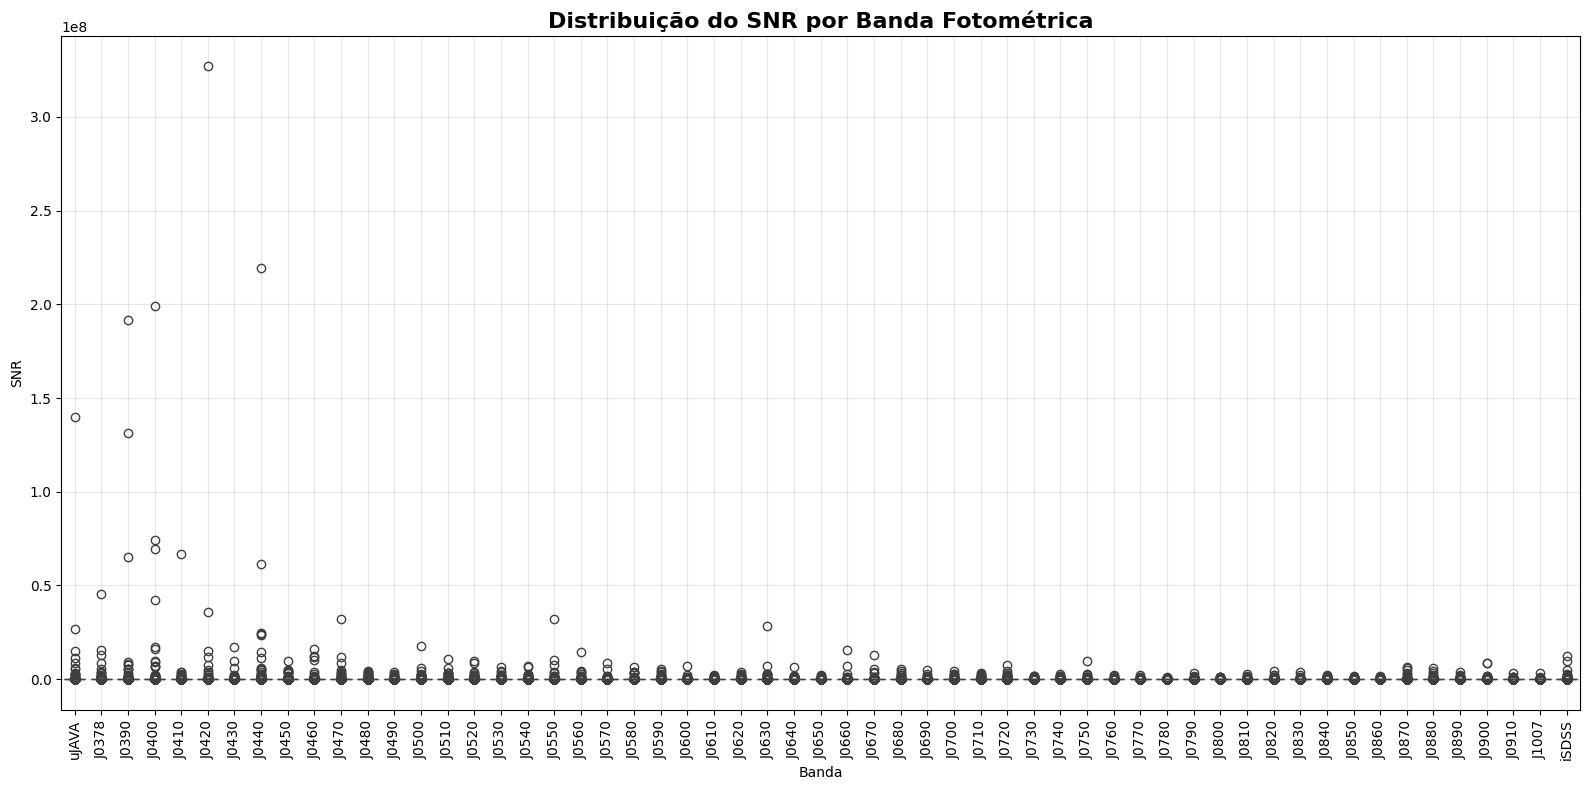


3. ESTATÍSTICAS SUMARIZADAS POR BANDA:

Top 10 bandas com maior SNR médio:
    Banda       Média  Mediana  Desvio_Padrão  Mínimo        Máximo     Q1  \
2   J0390  701935.484   28.799   5.982010e+07     0.0  7.886137e+09  1.002   
0   uJAVA  626324.088   17.671   3.567864e+07     0.0  4.456594e+09  0.463   
4   J0410  429295.216   53.614   3.896987e+07     0.0  5.154972e+09  2.263   
1   J0378  352026.761   21.295   1.151978e+07     0.0  1.073997e+09  0.614   
3   J0400  233118.741   51.510   4.060200e+06     0.0  2.071545e+08  1.848   
5   J0420  201282.253   53.791   4.902426e+06     0.0  4.328668e+08  2.076   
6   J0430  183577.575   61.214   4.516725e+06     0.0  3.880291e+08  2.697   
7   J0440  174861.733   96.113   5.151701e+06     0.0  6.022864e+08  4.556   
11  J0480  109149.886  123.779   1.747482e+06     0.0  1.150809e+08  7.306   
10  J0470  106410.511  103.365   4.257915e+06     0.0  5.499894e+08  7.141   

          Q3       IQR  
2   1081.693  1080.691  
0    820.382   

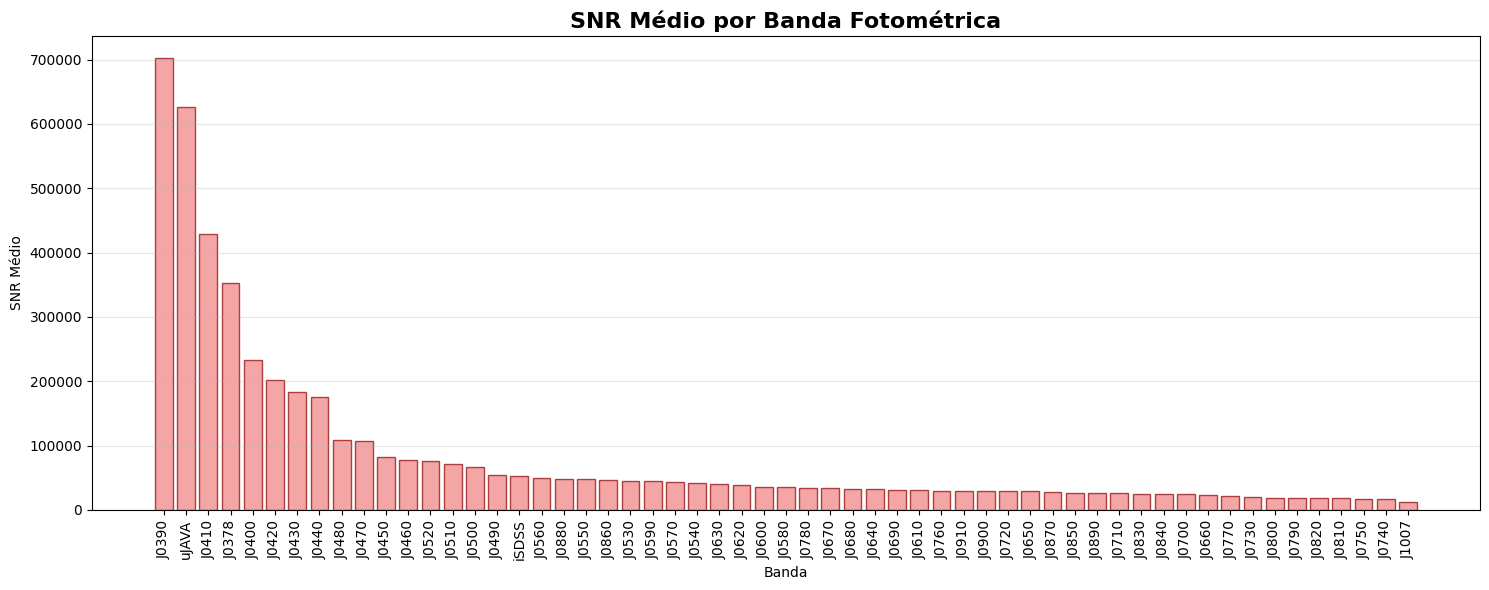

In [23]:
## Visualização Comparativa e Sumarização

print("\n" + "=" * 60)
print("FASE 5: Visualização Comparativa e Sumarização")
print("=" * 60)

def visualizacao_comparativa_snr(df_snr_fluxo, filter_names):
    """
    Visualizações comparativas completas do SNR entre bandas
    """

    # 1. Boxplot de todas as bandas
    print("1. GERANDO BOXPLOT COMPARATIVO...")

    # Preparar dados para boxplot
    snr_data_boxplot = []
    bandas_boxplot = []

    for banda in filter_names:
        # Use df_snr_fluxo here
        snr_values = df_snr_fluxo[f'SNR_{banda}'].values
        # Amostrar para não sobrecarregar o plot
        if len(snr_values) > 1000:
            snr_values = np.random.choice(snr_values, size=1000, replace=False)
        snr_data_boxplot.extend(snr_values)
        bandas_boxplot.extend([banda] * len(snr_values))

    df_boxplot = pd.DataFrame({
        'Banda': bandas_boxplot,
        'SNR': snr_data_boxplot
    })

    plt.figure(figsize=(16, 8))
    sns.boxplot(data=df_boxplot, x='Banda', y='SNR')
    plt.title('Distribuição do SNR por Banda Fotométrica', fontsize=16, fontweight='bold')
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2. Correlation Heatmap (Opcional, pode ser muito grande)
    # print("\n2. GERANDO CORRELATION HEATMAP (PODE DEMORAR OU SER MUITO GRANDE)...")
    # try:
    #     # Selecionar apenas as colunas de SNR para o heatmap
    #     snr_cols = [col for col in df_snr_fluxo.columns if col.startswith('SNR_')]
    #     if snr_cols:
    #         correlation_matrix = df_snr_fluxo[snr_cols].corr()
    #         plt.figure(figsize=(12, 10))
    #         sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    #         plt.title('Correlation Heatmap do SNR entre Bandas', fontsize=16, fontweight='bold')
    #         plt.show()
    #     else:
    #         print("Nenhuma coluna de SNR encontrada para o heatmap.")
    # except Exception as e:
    #     print(f"Erro ao gerar heatmap: {e}")


    # 3. Estatísticas sumarizadas
    print("\n3. ESTATÍSTICAS SUMARIZADAS POR BANDA:")

    estatisticas_por_banda = []
    for banda in filter_names:
        # Use df_snr_fluxo here
        snr_banda = df_snr_fluxo[f'SNR_{banda}']
        estatisticas_por_banda.append({
            'Banda': banda,
            'Média': snr_banda.mean(),
            'Mediana': snr_banda.median(),
            'Desvio_Padrão': snr_banda.std(),
            'Mínimo': snr_banda.min(),
            'Máximo': snr_banda.max(),
            'Q1': snr_banda.quantile(0.25),
            'Q3': snr_banda.quantile(0.75),
            'IQR': snr_banda.quantile(0.75) - snr_banda.quantile(0.25)
        })

    snr_stats_df = pd.DataFrame(estatisticas_por_banda)

    # Ordenar por média de SNR (decrescente)
    snr_stats_df = snr_stats_df.sort_values('Média', ascending=False)

    print("\nTop 10 bandas com maior SNR médio:")
    print(snr_stats_df.head(10).round(3))

    print("\nBottom 10 bandas com menor SNR médio:")
    print(snr_stats_df.tail(10).round(3))

    # 4. Gráfico de barras com SNR médio por banda
    plt.figure(figsize=(15, 6))
    plt.bar(snr_stats_df['Banda'], snr_stats_df['Média'],
            color='lightcoral', alpha=0.7, edgecolor='darkred')
    plt.title('SNR Médio por Banda Fotométrica', fontsize=16, fontweight='bold')
    plt.xlabel('Banda')
    plt.ylabel('SNR Médio')
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return snr_stats_df

# Executar análise comparativa
snr_stats_df = visualizacao_comparativa_snr(df_snr_fluxo, filter_names)

####  SALVANDO TODOS OS RESULTADOS

In [28]:
print("\n" + "=" * 60)
print("SALVANDO RESULTADOS FINAIS")
print("=" * 60)

# Salvar todos os DataFrames processados
df_snr_fluxo.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_snr_fluxo_calculado.csv', index=False)
df_fluxo.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_fluxos_calculados.csv', index=False)
df_fluxo_err.to_csv('/content/drive/MyDrive/Notebook fotometrias/df_erros_fluxo_calculados.csv', index=False)
snr_stats_df.to_csv('/content/drive/MyDrive/Notebook fotometrias/estatisticas_snr_por_banda.csv', index=False)

print("Arquivos salvos com sucesso:")
print("   - df_snr_fluxo_calculado.csv: SNR para todas as estrelas e bandas")
print("   - df_fluxos_calculados.csv: Fluxos convertidos de magnitudes (df)")
print("   - df_erros_fluxo_calculados.csv: Erros dos fluxos convertidos (df_err)")
print("   - estatisticas_snr_por_banda.csv: Estatísticas sumarizadas por banda")

print("\n Resumo da conversão:")
print(f"   Fluxos convertidos: {len([col for col in df_fluxo.columns if col.startswith('fluxo_')])} bandas")
print(f"   Erros de fluxo convertidos: {len([col for col in df_fluxo_err.columns if col.startswith('erro_fluxo_')])} bandas")
print(f"   Cálculos de SNR realizados: {len([col for col in df_snr_fluxo.columns if col.startswith('SNR_')])} bandas")

print("\n PRÉ-PROCESSAMENTO CONCLUÍDO COM SUCESSO!")
print("   Todos os dados convertidos e SNR calculado para df e df_err")


SALVANDO RESULTADOS FINAIS
Arquivos salvos com sucesso:
   - df_snr_fluxo_calculado.csv: SNR para todas as estrelas e bandas
   - df_fluxos_calculados.csv: Fluxos convertidos de magnitudes (df)
   - df_erros_fluxo_calculados.csv: Erros dos fluxos convertidos (df_err)
   - estatisticas_snr_por_banda.csv: Estatísticas sumarizadas por banda

 Resumo da conversão:
   Fluxos convertidos: 57 bandas
   Erros de fluxo convertidos: 57 bandas
   Cálculos de SNR realizados: 57 bandas

 PRÉ-PROCESSAMENTO CONCLUÍDO COM SUCESSO!
   Todos os dados convertidos e SNR calculado para df e df_err
